/var/folders/j6/_f4gqc7j33nb2dzqnzm9w2w00000gn/T/ipykernel_60346/3157981711.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Dataset", y="IC50", data=df_all, palette="Set2")


ValueError: cannot reindex on an axis with duplicate labels

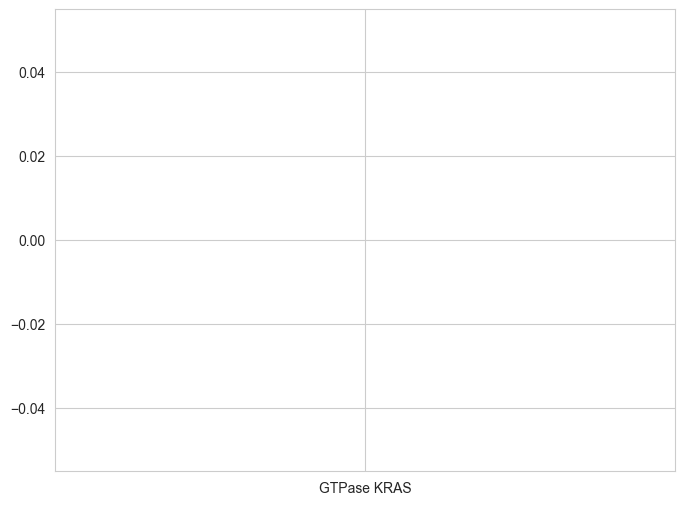

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load each dataset
df_kras = pd.read_csv("/Users/user/Downloads/Drug Design FInal/FINAL_GIT/Raw Files/merged_features_IC50_gtpase_kras.csv")
df_g12c = pd.read_csv("/Users/user/Downloads/Drug Design FInal/FINAL_GIT/Raw Files/new_merged_features_IC50_g12c.csv")
df_g12d = pd.read_csv("/Users/user/Downloads/Drug Design FInal/FINAL_GIT/Raw Files/merged_features_IC50_g12d.csv")

# Standardize column names
df_kras["IC50"] = df_kras['Standard Value']
df_g12c["IC50"] = df_g12c['IC50 (nM)']
df_g12d["IC50"] = df_g12d['IC50 (nM)']

# Add a 'Dataset' column to each dataset
df_kras["Dataset"] = "GTPase KRAS"
df_g12c["Dataset"] = "G12C"
df_g12d["Dataset"] = "G12D"

# Concatenate all datasets into one DataFrame
df_all = pd.concat([df_kras[['IC50', 'Dataset']], df_g12c[['IC50', 'Dataset']], df_g12d[['IC50', 'Dataset']]])

df_all['IC50'] = df_all['IC50'].str.lstrip('<>').astype(float)


# Box plot: Compare IC50 distributions across datasets
plt.figure(figsize=(8, 6))
sns.boxplot(x="Dataset", y="IC50", data=df_all, palette="Set2")
plt.xlabel("Dataset")
plt.ylabel("IC50 (nM)")
plt.title("Distribution of IC50 Values Across Datasets")
plt.show()

# Violin plot: Show data density per dataset
plt.figure(figsize=(8, 6))
sns.violinplot(x="Dataset", y="IC50", data=df_all, palette="Set2", inner="box")
plt.xlabel("Dataset")
plt.ylabel("IC50 (nM)")
plt.title("Violin Plot of IC50 Values Across Datasets")
plt.show()

# Histogram: Faceted view of IC50 distributions per dataset
g = sns.FacetGrid(df_all, col="Dataset", height=4, aspect=1.2)
g.map(sns.histplot, "IC50", bins=15, kde=True, color="steelblue", alpha=0.6)
g.set_axis_labels("IC50 (nM)", "Frequency")
g.set_titles(col_template="{col_name} Dataset")
plt.show()


GTPase KRAS: 15.96% of data has IC50 <= 10 nM
G12C: 6.74% of data has IC50 <= 10 nM
G12D: 51.27% of data has IC50 <= 10 nM


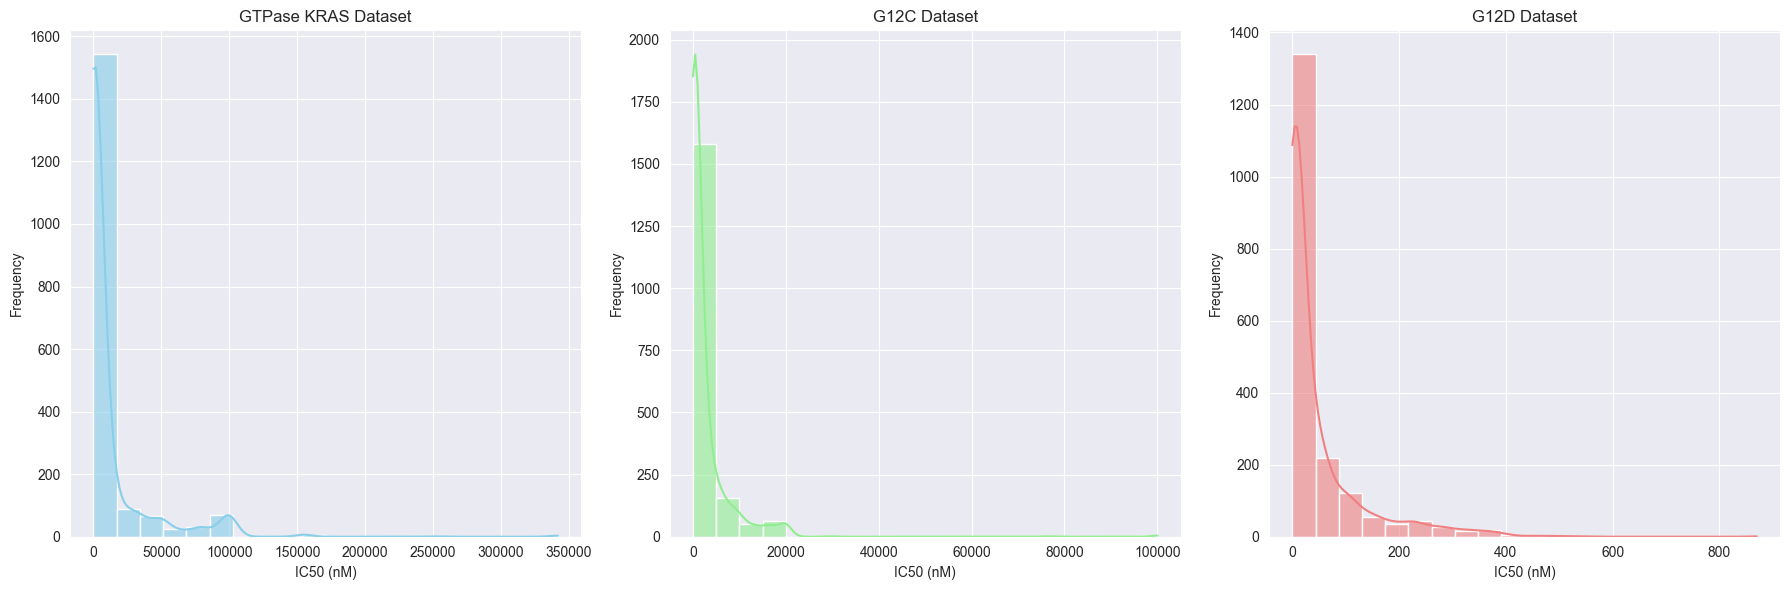

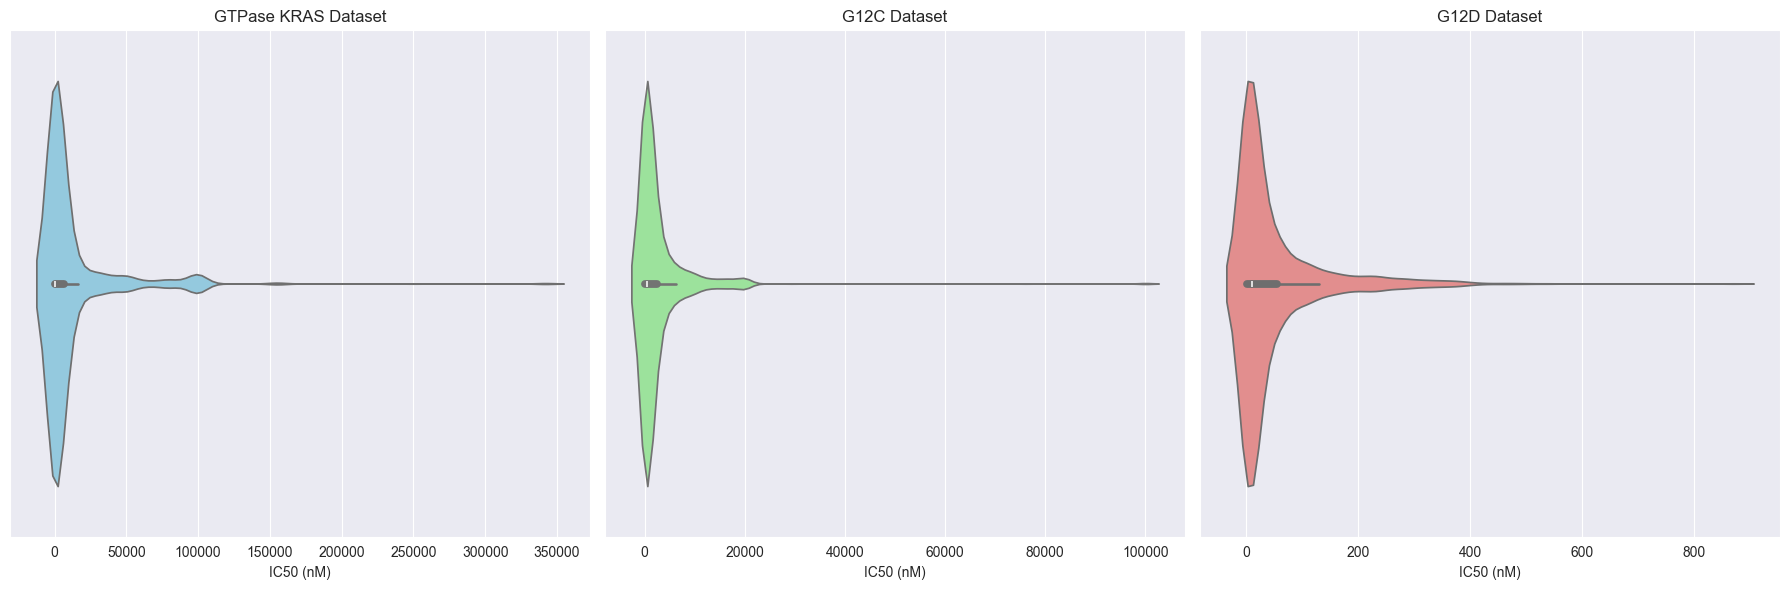

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load each dataset
df_kras = pd.read_csv("/Users/user/Downloads/Drug Design FInal/FINAL_GIT/Raw Files/merged_features_IC50_gtpase_kras.csv")
df_g12c = pd.read_csv("/Users/user/Downloads/Drug Design FInal/FINAL_GIT/Raw Files/new_merged_features_IC50_g12c.csv")
df_g12d = pd.read_csv("/Users/user/Downloads/Drug Design FInal/FINAL_GIT/Raw Files/new_merged_features_IC50_g12d.csv")

# Standardize column names
df_kras["IC50"] = df_kras['Standard Value']  # Assuming 'Standard Value' contains IC50 data in this dataset
df_g12c["IC50"] = df_g12c['IC50 (nM)']  # This column seems to be the IC50 for the G12C dataset
df_g12d["IC50"] = df_g12d['IC50 (nM)']  # Same for G12D dataset

# Ensure the 'IC50' columns are of string type before applying .str methods
df_kras["IC50"] = df_kras["IC50"].astype(str).str.lstrip('<>').astype(float)
df_g12c["IC50"] = df_g12c["IC50"].astype(str).str.lstrip('<>').astype(float)
df_g12d["IC50"] = df_g12d["IC50"].astype(str).str.lstrip('<>').astype(float)

# Add a 'Dataset' column to each dataset
df_kras["Dataset"] = "GTPase KRAS"
df_g12c["Dataset"] = "G12C"
df_g12d["Dataset"] = "G12D"

# Concatenate all datasets into one DataFrame for shared visualization
df_all = pd.concat([df_kras[['IC50', 'Dataset']], df_g12c[['IC50', 'Dataset']], df_g12d[['IC50', 'Dataset']]])

# Calculate and print the percentage of IC50 values <= 10,000 for each dataset
threshold = 10

def calc_percent_below_threshold(df, label):
    total = len(df)
    below_threshold = (df['IC50'] <= threshold).sum()
    percent = (below_threshold / total) * 100
    print(f"{label}: {percent:.2f}% of data has IC50 <= {threshold} nM")

calc_percent_below_threshold(df_kras, "GTPase KRAS")
calc_percent_below_threshold(df_g12c, "G12C")
calc_percent_below_threshold(df_g12d, "G12D")


# 1. **Individual Histograms for Each Dataset:**
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# GTPase KRAS
sns.histplot(df_kras['IC50'], bins=20, kde=True, ax=axes[0], color="skyblue", alpha=0.6)
axes[0].set_title("GTPase KRAS Dataset")
axes[0].set_xlabel("IC50 (nM)")
axes[0].set_ylabel("Frequency")

# G12C
sns.histplot(df_g12c['IC50'], bins=20, kde=True, ax=axes[1], color="lightgreen", alpha=0.6)
axes[1].set_title("G12C Dataset")
axes[1].set_xlabel("IC50 (nM)")
axes[1].set_ylabel("Frequency")

# G12D
sns.histplot(df_g12d['IC50'], bins=20, kde=True, ax=axes[2], color="lightcoral", alpha=0.6)
axes[2].set_title("G12D Dataset")
axes[2].set_xlabel("IC50 (nM)")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# 2. **Violin Plots for Each Dataset:**
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# GTPase KRAS
sns.violinplot(x=df_kras['IC50'], ax=axes[0], color="skyblue")
axes[0].set_title("GTPase KRAS Dataset")
axes[0].set_xlabel("IC50 (nM)")

# G12C
sns.violinplot(x=df_g12c['IC50'], ax=axes[1], color="lightgreen")
axes[1].set_title("G12C Dataset")
axes[1].set_xlabel("IC50 (nM)")

# G12D
sns.violinplot(x=df_g12d['IC50'], ax=axes[2], color="lightcoral")
axes[2].set_title("G12D Dataset")
axes[2].set_xlabel("IC50 (nM)")

plt.tight_layout()
plt.show()


In [8]:
print(df_g12c["IC50"].max())
print(df_kras["IC50"].max())
print(df_g12d["IC50"].max())
print(df_g12c["IC50"].min())
print(df_kras["IC50"].min())
print(df_g12d["IC50"].min())

100000.0
342000.0
870.0
1.97
0.1
0.3


In [4]:
df_g12c

,ChEMBL ID,Smiles,FC,N,H,Cl,Br,I,P,F,...,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,IC50 (nM),IC50,Dataset
0,1432260,COc1nc2nc(C)nc(N[C@H](C)c3cccc(c3C)C(F)(F)F)c2...,0,280,29,0,0,0,1,3,...,0,0,0,0,0,0,0,1.97,1.97,G12C
1,1432311,C[C@@H](Nc1nc(Cl)nc2cnc(cc12)P1(=O)CCN(CC1)C(C...,0,272,24,1,0,0,1,3,...,0,0,0,0,0,0,0,2.38,2.38,G12C
2,1348122,C[C@@H](Nc1nc(C)nc2ncc(cc12)N1CCN(CC1=O)C(C)=O...,0,254,25,0,0,0,0,3,...,0,0,0,0,0,0,0,2.53,2.53,G12C
3,1348107,C[C@@H](Nc1nc(C)nc2ncc(cc12)C1=CCN(CC1)C(C)=O)...,0,270,30,0,0,0,0,3,...,0,0,0,0,0,0,0,2.70,2.70,G12C
4,1348085,C[C@@H](Nc1nc(C)nc2nc(c(cc12)N1CC2(CN(C2)C(C)=...,0,294,26,0,0,0,0,6,...,0,0,0,0,0,0,0,2.80,2.80,G12C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1850,1386298,COc1cc2nc(C)nc(NC(C)c3ccc(s3)-c3ccc(F)cc3CN)c2...,0,238,25,0,0,0,0,1,...,0,0,0,0,1,0,0,92.1,92.10,G12C
1851,1438494,C[C@@H](Nc1nn(C)c(=O)c2cc(=O)n(cc12)[C@H]1C[C@...,0,230,20,0,0,0,0,3,...,0,0,0,0,0,0,0,92.8,92.80,G12C
1852,1432129,C[C@@H](Nc1nc(C)nc2cnc(cc12)P1(=O)CCN(Cc2ccccc...,0,282,29,0,0,0,1,3,...,0,0,0,0,0,0,0,94.0,94.00,G12C
1853,1386990,CC(Nc1nc(C)nc2ccc(cc12)N1CCCC1)c1ccc(s1)-c1ccc...,0,252,33,0,0,0,0,0,...,0,0,0,0,1,0,0,94.2,94.20,G12C


In [6]:
df_kras

,ChEMBL ID,Smiles,FC,N,H,Cl,Br,I,P,F,...,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,Standard Value,IC50,Dataset
0,CHEMBL5428861,C[C@H](Oc1nc2c(F)c(-c3cccc(Cl)c3Cl)c(CCC#N)cc2...,0,368,37,2,0,0,0,1,...,0,0,0,0,0,0,0,100.0,100.0,GTPase KRAS
1,CHEMBL5428861,C[C@H](Oc1nc2c(F)c(-c3cccc(Cl)c3Cl)c(CCC#N)cc2...,0,368,37,2,0,0,0,1,...,0,0,0,0,0,0,0,100.0,100.0,GTPase KRAS
2,CHEMBL5207895,C=Cc1ncc2n1CCN(c1nc(=O)n(CC3CC3)c3nc(-c4c(O)cc...,0,248,22,0,0,0,0,2,...,0,0,0,0,0,0,0,100.0,100.0,GTPase KRAS
3,CHEMBL5207895,C=Cc1ncc2n1CCN(c1nc(=O)n(CC3CC3)c3nc(-c4c(O)cc...,0,248,22,0,0,0,0,2,...,0,0,0,0,0,0,0,5000.0,5000.0,GTPase KRAS
4,CHEMBL3218637,CC1(C)COC(=O)[C@H](Cc2ccccc2)NC(=O)[C@H](CCCNC...,0,734,92,0,0,0,0,0,...,0,0,0,0,0,0,0,1800.0,1800.0,GTPase KRAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,CHEMBL4456598,C=CC(=O)N1CCN(c2nc(OC[C@@H]3CCCN3C)nc3c2CCN(c2...,0,282,36,0,0,0,0,0,...,0,0,0,0,0,0,0,48.0,48.0,GTPase KRAS
1844,CHEMBL4456598,C=CC(=O)N1CCN(c2nc(OC[C@@H]3CCCN3C)nc3c2CCN(c2...,0,282,36,0,0,0,0,0,...,0,0,0,0,0,0,0,142.0,142.0,GTPase KRAS
1845,CHEMBL5077861,C=CC(=O)N1CC2(CC(n3nc(-c4ccc5c(cnn5C)c4)c(-c4c...,0,276,28,1,0,0,0,0,...,0,0,0,0,0,0,0,20.0,20.0,GTPase KRAS
1846,CHEMBL5077861,C=CC(=O)N1CC2(CC(n3nc(-c4ccc5c(cnn5C)c4)c(-c4c...,0,276,28,1,0,0,0,0,...,0,0,0,0,0,0,0,444.0,444.0,GTPase KRAS


In [7]:
df_g12d

,ChEMBL ID,Smiles,FC,N,H,Cl,Br,I,P,F,...,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,IC50 (nM),IC50,Dataset
0,1408564,CC[C@H](C)[C@@H]1NC(=O)[C@H](C)N(C)C(=O)C[C@H]...,0,742,104,1,0,0,0,3,...,0,0,0,0,0,0,0,0.300,0.30,G12D
1,1408599,CCCOC[C@@H]1N(C)C(=O)[C@@H]2CCN2C(=O)[C@H](C)N...,0,736,104,0,0,0,0,4,...,0,0,0,0,0,0,0,0.300,0.30,G12D
2,1409919,CC[C@H](C)[C@@H]1NC(=O)[C@H](CC)N(C)C(=O)C[C@H...,0,752,102,1,0,0,0,3,...,0,0,0,0,0,0,0,0.330,0.33,G12D
3,1409995,CCC[C@@H]1N(C)C(=O)C[C@H](N(C)C(=O)[C@H](C2CCC...,0,760,104,1,0,0,0,3,...,0,0,0,0,0,0,0,0.330,0.33,G12D
4,1408422,CC[C@H](C)[C@@H]1NC(=O)[C@H](C2CCC2)N(C)C(=O)C...,0,790,101,1,0,0,0,6,...,0,0,0,0,0,0,0,0.330,0.33,G12D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1881,1408425,CC[C@H](C)[C@@H]1NC(=O)[C@H](CC(C)C)N(C)C(=O)C...,0,768,106,1,0,0,0,5,...,0,0,0,0,0,0,0,1.60,1.60,G12D
1882,1408468,CC[C@H](C)[C@@H]1NC(=O)[C@H](CC(C)C)N(C)C(=O)C...,0,756,106,1,0,0,0,3,...,0,0,0,0,0,0,0,1.60,1.60,G12D
1883,1408490,CCCCC[C@@H]1N(C)C(=O)C[C@H](N(C)C(=O)[C@H](C2C...,0,764,108,1,0,0,0,3,...,0,0,0,0,0,0,0,1.60,1.60,G12D
1884,1408534,CCCCC[C@@H]1N(C)C(=O)C[C@H](N(C)C(=O)[C@H]([C@...,0,792,103,1,0,0,0,6,...,0,0,0,0,0,0,0,1.60,1.60,G12D


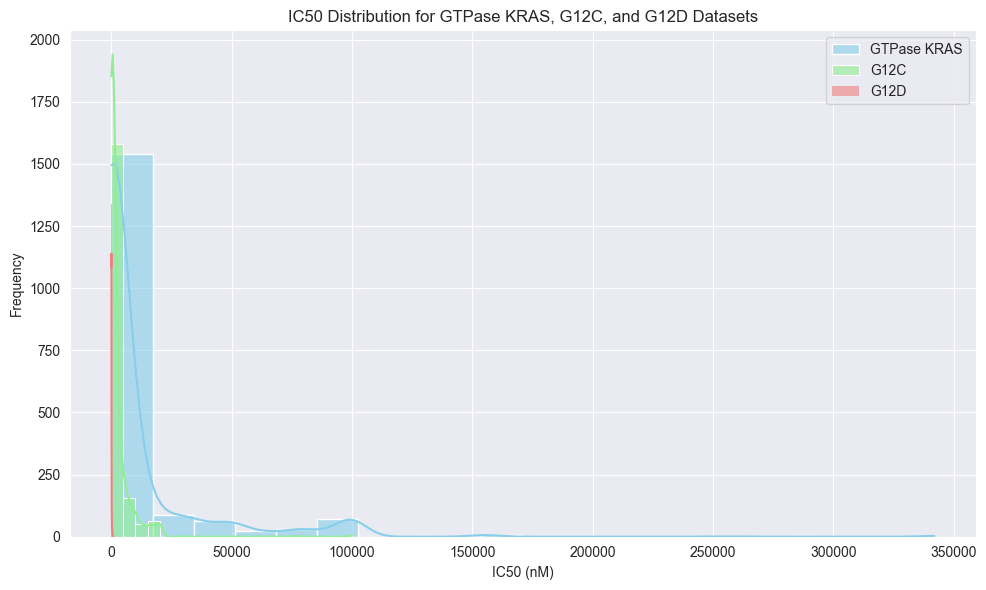

In [9]:


# Concatenate all datasets into one DataFrame for shared visualization
df_all = pd.concat([df_kras[['IC50', 'Dataset']], df_g12c[['IC50', 'Dataset']], df_g12d[['IC50', 'Dataset']]])

# 1. **Overlayed Histogram for All Datasets:**
plt.figure(figsize=(10, 6))

# Plot histograms for each dataset with different colors
sns.histplot(df_kras['IC50'], bins=20, kde=True, color="skyblue", alpha=0.6, label="GTPase KRAS")
sns.histplot(df_g12c['IC50'], bins=20, kde=True, color="lightgreen", alpha=0.6, label="G12C")
sns.histplot(df_g12d['IC50'], bins=20, kde=True, color="lightcoral", alpha=0.6, label="G12D")

# Add labels and title
plt.title("IC50 Distribution for GTPase KRAS, G12C, and G12D Datasets")
plt.xlabel("IC50 (nM)")
plt.ylabel("Frequency")
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()




IC50 Distribution Stats:
Min: 0.49 nM
Max: 150000.00 nM
Mean: 3272.50 nM
Median: 290.50 nM
Standard Deviation: 10190.37 nM

Percentiles:
0.25       55.0
0.50      290.5
0.75      550.0
0.90     5500.0
0.95    14710.0
0.99    50000.0
Name: IC50 (nM), dtype: float64


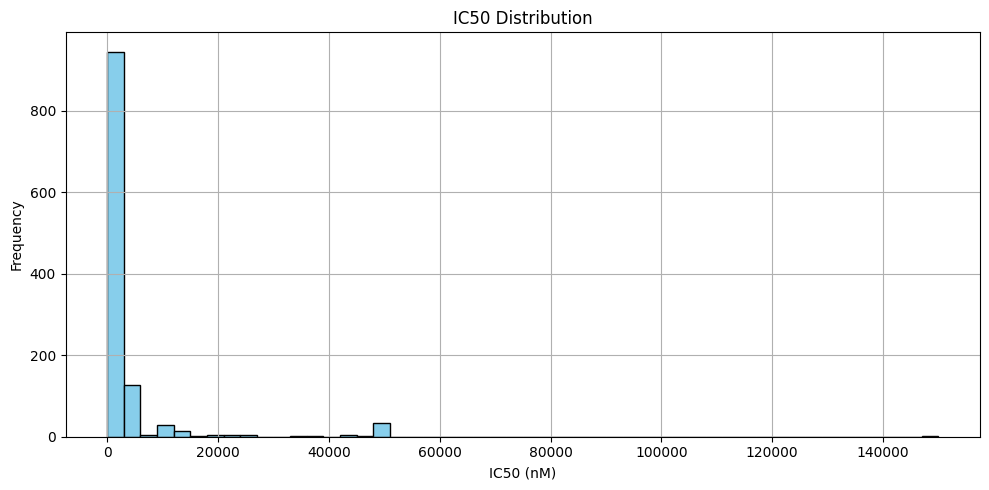

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/Users/user/PycharmProjects/Drug Design FInal/FINAL_GIT/Raw Files/merged_features_IC50_g12c.csv")

# Ensure the IC50 values are in numeric form
df['IC50 (nM)'] = df['IC50 (nM)'].str.lstrip('<>').astype(float) # handle non-numeric or special characters

# Drop missing values just for stats/plotting
df = df.dropna(subset=['IC50 (nM)'])

# Print distribution statistics
print("IC50 Distribution Stats:")
print(f"Min: {df['IC50 (nM)'].min():.2f} nM")
print(f"Max: {df['IC50 (nM)'].max():.2f} nM")
print(f"Mean: {df['IC50 (nM)'].mean():.2f} nM")
print(f"Median: {df['IC50 (nM)'].median():.2f} nM")
print(f"Standard Deviation: {df['IC50 (nM)'].std():.2f} nM")

# Optional: Show percentiles
print("\nPercentiles:")
print(df['IC50 (nM)'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))

# Histogram plot
plt.figure(figsize=(10, 5))
plt.hist(df['IC50 (nM)'], bins=50, color='skyblue', edgecolor='black')
plt.title('IC50 Distribution')
plt.xlabel('IC50 (nM)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


In [3]:
# Count how many times each IC50 value appears
ic50_counts = df['IC50 (nM)'].value_counts()

# Filter to show only values that appear more than once
duplicates = ic50_counts[ic50_counts > 1]

# Sort and print
print("IC50 values with multiple entries:")
print(duplicates.sort_values(ascending=False))

IC50 values with multiple entries:
IC50 (nM)
55.0       280
550.0      276
10.0       132
5500.0     102
50000.0     34
          ... 
5300.0       2
806.0        2
880.0        2
3500.0       2
20.0         2
Name: count, Length: 64, dtype: int64
